<a href="https://colab.research.google.com/github/SandeepGandham4/Data-Science-Intern-Assignment-Zeotap/blob/main/Sandeep_Gandham_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Exploratory Data Analysis (EDA) and Business Insights

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

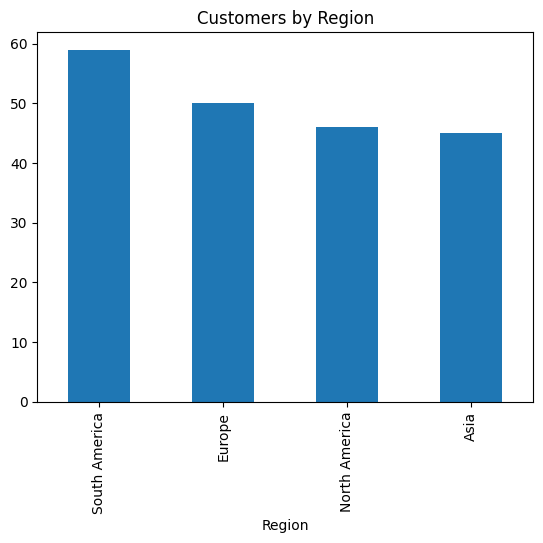

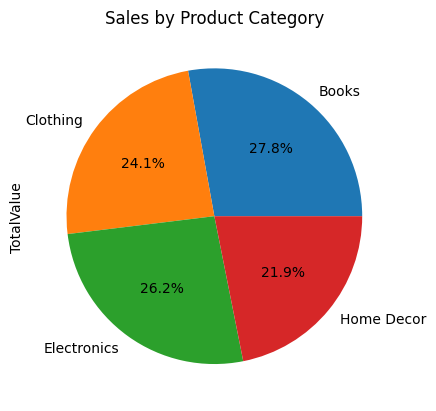

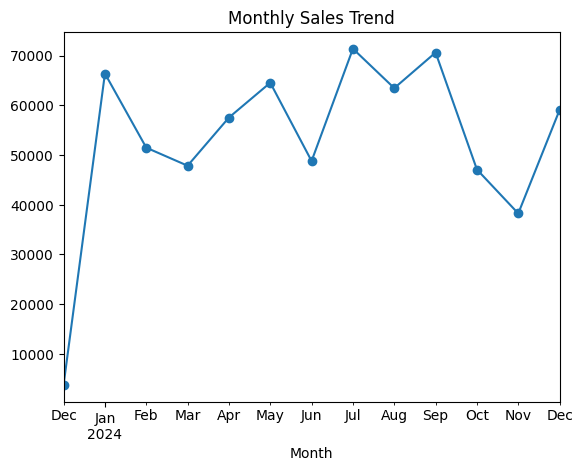

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Data Overview
print(customers.info())
print(products.info())
print(transactions.info())

# Handle missing values (example)
customers.fillna('Unknown', inplace=True)
products.dropna(subset=['Price'], inplace=True)

# Convert date columns
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# EDA: Customers by Region
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Customers by Region')
plt.show()

# EDA: Product Categories
category_sales = products.merge(transactions, on='ProductID').groupby('Category')['TotalValue'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Product Category')
plt.show()

# EDA: Monthly Sales Trend
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(title='Monthly Sales Trend', marker='o')
plt.show()
